In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

2025-02-02 05:54:09.179704: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-02 05:54:09.196670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738475649.215733    2281 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738475649.221541    2281 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-02 05:54:09.240638: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos_extracted/flower_photos')

In [4]:
classes = ["roses", "daisy", "dandelion", "sunflowers", "tulips"]

In [5]:
zip_file_base = os.path.dirname(zip_file)
!find $zip_file_base -type d -print

/home/jovyan/.keras/datasets
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train/cats
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train/dogs
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation/cats
/home/jovyan/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation/dogs
/home/jovyan/.keras/datasets/flower_photos_extracted
/home/jovyan/.keras/datasets/flower_photos_extracted/flower_photos
/home/jovyan/.keras/datasets/flower_photos_extracted/flower_photos/tulips
/home/jovyan/.keras/datasets/flower_photos_extrac

In [21]:
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")

In [7]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images


Error: Destination path '/home/jovyan/.keras/datasets/flower_photos_extracted/flower_photos/train/roses/23232710191_cc57620cd5.jpg' already exists

In [8]:
for cl in classes:
    print("{}: {} Images".format(cl, len(images)))

roses: 641 Images
daisy: 641 Images
dandelion: 641 Images
sunflowers: 641 Images
tulips: 641 Images


In [9]:
BATCH_SIZE = 100
IMG_SIZE = 150

In [17]:
img_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.5,
    horizontal_flip=True)

train_data_gen = img_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_SIZE, IMG_SIZE),
                                                   class_mode="sparse")

Found 2935 images belonging to 5 classes.


In [18]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [14]:
!pip install scipy

  Using cached scipy-1.15.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.2 MB)


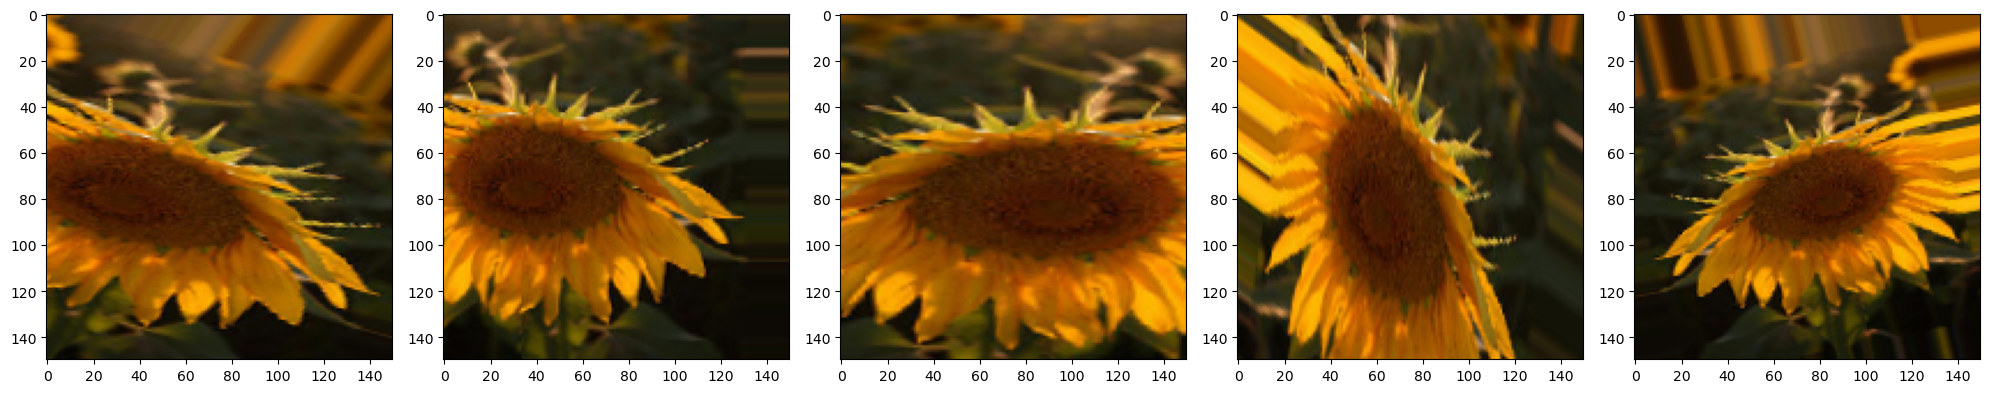

In [19]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augumented_images)

In [22]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode="sparse")

Found 735 images belonging to 5 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)
])

I0000 00:00:1738477789.958351    2281 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [31]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [36]:
EPOCHS = 80
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80


I0000 00:00:1738478144.591705    4194 service.cc:148] XLA service 0x7fe09c004780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738478144.591736    4194 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-02-02 06:35:44.630272: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738478144.793229    4194 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-02 06:35:45.207572: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[100,16,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,3,150,150]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"acti

 1/30 ━━━━━━━━━━━━━━━━━━━━ 3:00 6s/step - accuracy: 0.2500 - loss: 1.6150

I0000 00:00:1738478148.748454    4194 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 5/30 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - accuracy: 0.2572 - loss: 2.6701

2025-02-02 06:35:50.959508: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[35,16,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[35,3,150,150]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-02 06:35:51.088774: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[35,32,75,75]{3,2,1,0}, u8[0]{0}) custom-call(f32[35,16,75,75]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivat

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.2546 - loss: 2.2145

2025-02-02 06:36:05.918885: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[100,16,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,3,150,150]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-02 06:36:06.182060: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[100,32,75,75]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,16,75,75]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 662ms/step - accuracy: 0.2560 - loss: 2.2007 - val_accuracy: 0.4150 - val_loss: 1.3103
Epoch 2/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 558ms/step - accuracy: 0.4790 - loss: 1.2559 - val_accuracy: 0.5306 - val_loss: 1.1110
Epoch 3/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 561ms/step - accuracy: 0.5390 - loss: 1.1223 - val_accuracy: 0.5592 - val_loss: 1.1400
Epoch 4/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 558ms/step - accuracy: 0.5688 - loss: 1.0631 - val_accuracy: 0.6041 - val_loss: 1.0014
Epoch 5/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 559ms/step - accuracy: 0.5734 - loss: 1.0710 - val_accuracy: 0.5592 - val_loss: 1.1248
Epoch 6/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 559ms/step - accuracy: 0.6028 - loss: 1.0140 - val_accuracy: 0.5986 - val_loss: 1.0149
Epoch 7/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 561ms/step - accuracy: 0.6300 - loss: 0.9604 - val_accuracy: 0.6354 - val_loss: 0.9493
Epoch 8/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 560ms/step - accuracy: 0.6435 - loss: 0.9066 - val_accuracy: 0.657

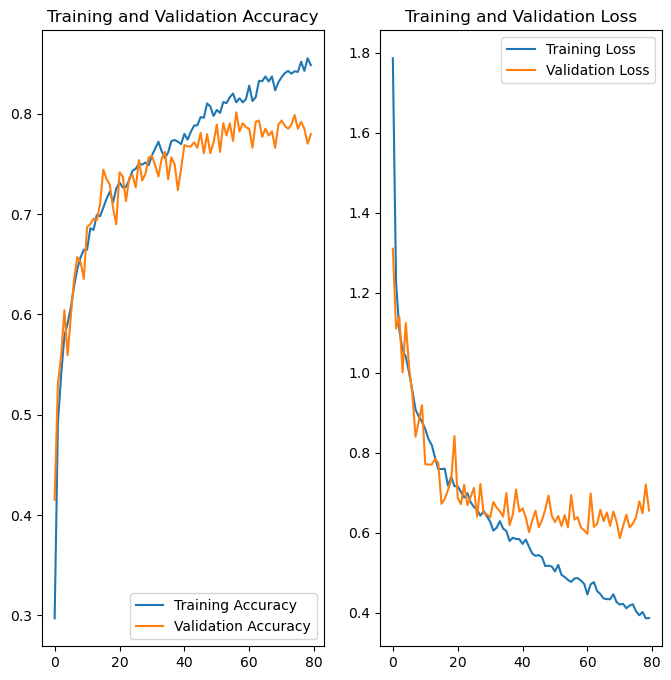

In [44]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()